In [1]:
#! /usr/bin/python3

import random

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# ============== read in data from a file ==============

df = open("airlines.txt", 'r')
num_vertices = 0

for line in df:
    line_list = line.strip().split()
    if line_list[0] == '*Vertices':
        num_vertices = int(line_list[1])
        break

print("num_vertices =", num_vertices)
G = nx.empty_graph(num_vertices)

reading_edges = False
for line in df:
    line_list = line.strip().split()
    if not reading_edges:
        if line_list[0] != "*Edges":
            continue
        else:
            reading_edges = True
            continue
    else:
        G.add_edge(int(line_list[0]), int(line_list[1]))


        
n = G.order()
ne = G.size()
max_deg = max(dict(G.degree()).values())

print("G is of order", n, "and size", ne, "and maximum degree is", max_deg) # just for info


num_vertices = 332
G is of order 333 and size 2126 and maximum degree is 139


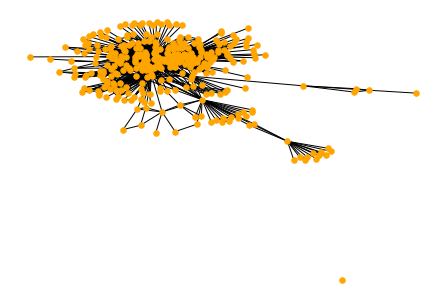

In [3]:
# Plot the network:
nx.draw(G, with_labels=False, node_color='orange', node_size=30, edge_color='black', linewidths=1, font_size=15)


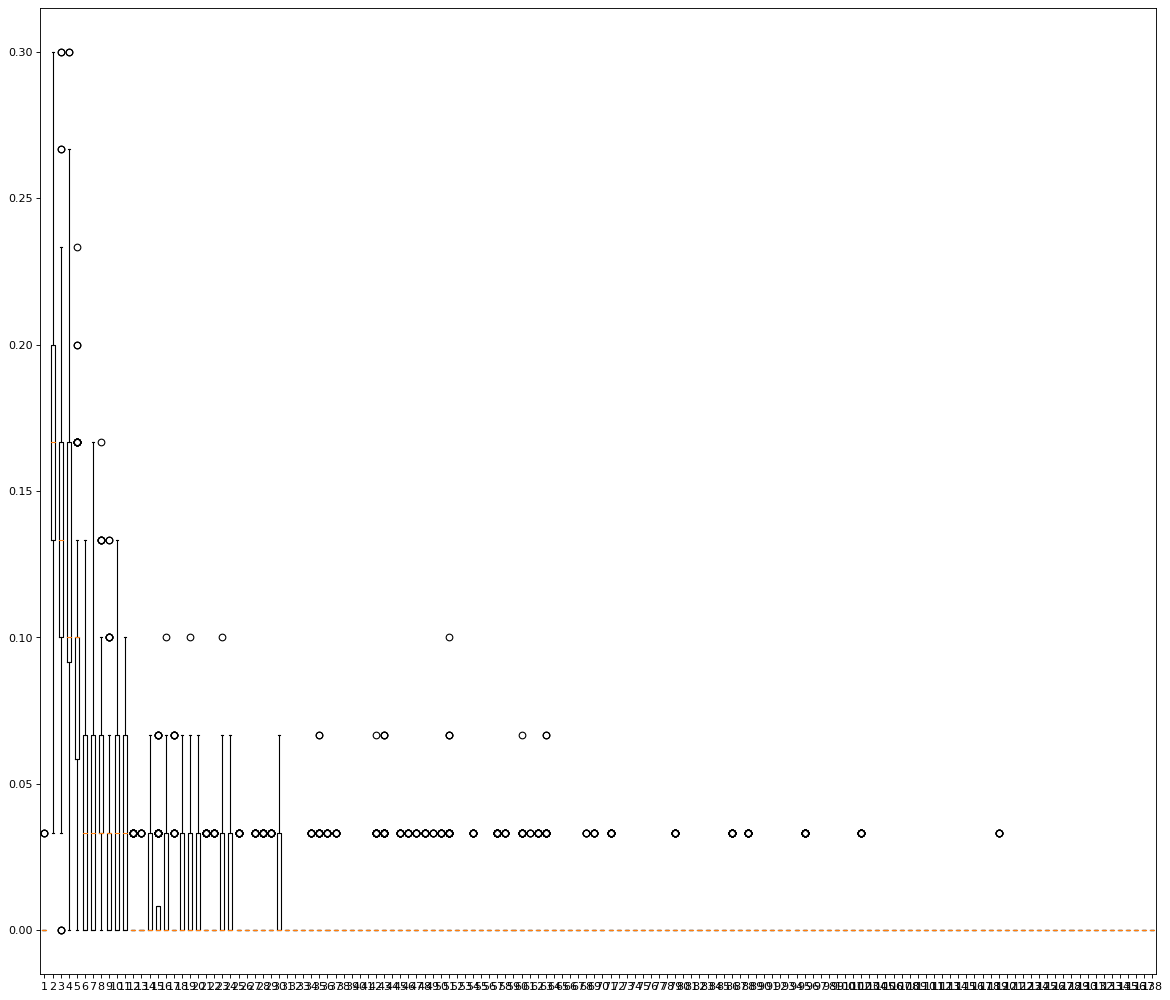

In [9]:
# ============== Degrees of Sample =============

k = 30 # sample size
r = 100 # num of reps



ns_degs = list() # list of r lists; each being list of degrees of sampled nodes
ns_dens = list() # list of r lists; each being list of normalized degrees of sampled nodes

for j in range(r):
    sample = random.sample(G.nodes(), k) # get j-th sample
    s_degs = [G.degree(node) for node in sample]
    ns_degs.append(s_degs)
    s_counts, bins = np.histogram(s_degs, bins=range(max_deg))
    ns_dens.append([c/k for c in s_counts])

Ls = list(zip(*ns_dens)) # make tuples containing k-th values from each list

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
myplt = plt.boxplot(Ls)
plt.show()

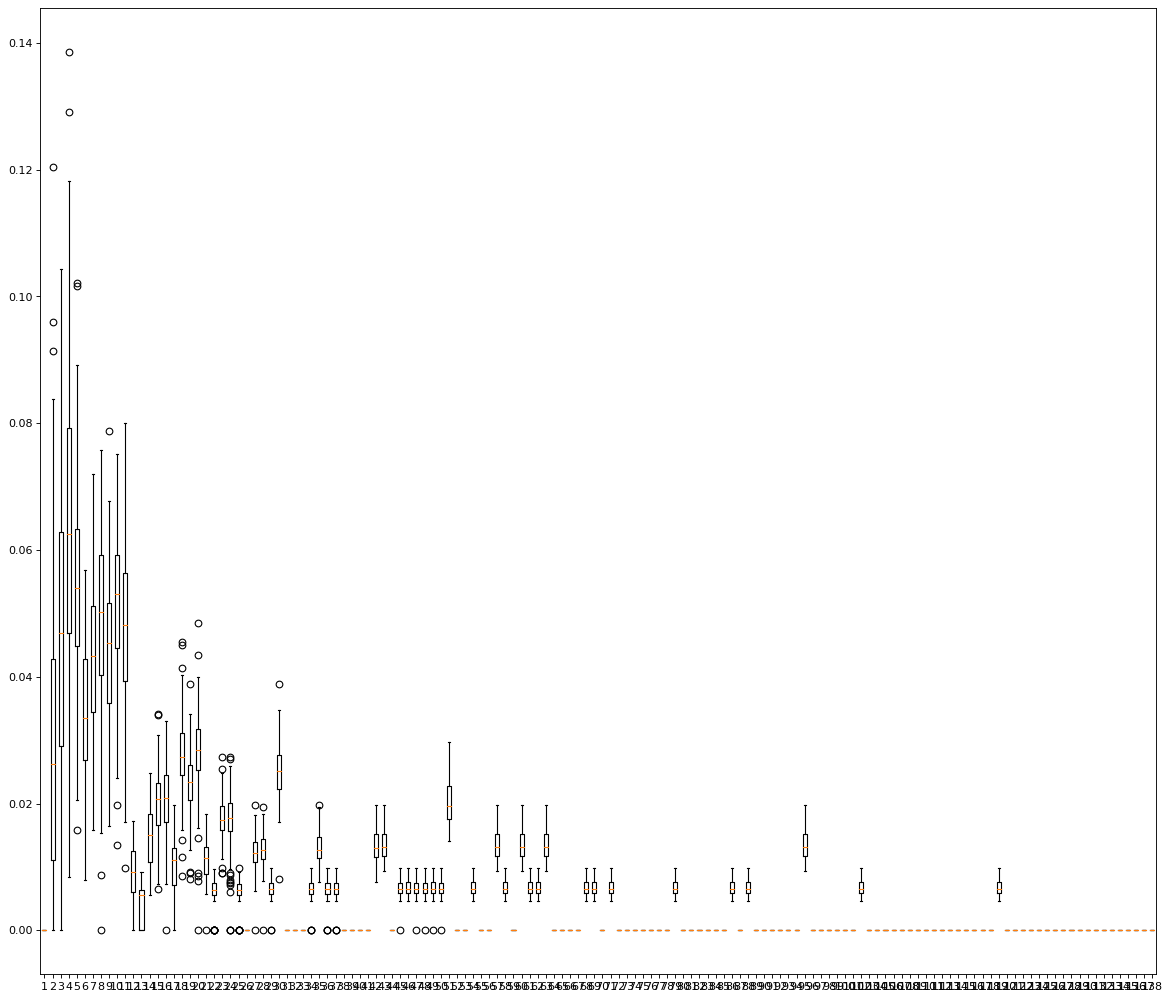

In [10]:
# ============== Degrees of Neighbours of sample =============

k = 30 # sample size
r = 100 # num of reps



nonr_degs = list() # list of r lists; each being list of degrees for neighbours of sampled nodes
nonr_dens = list() # list of r lists; each being list of normalized degrees for neighbours of sampled nodes

for j in range(r):
    sample = random.sample(G.nodes(), k) # get j-th sample
    non = list() # will hold neighbours of nodes
    for node in sample:
        non.extend(list(G.neighbors(node)))
    non = list(set(non)) # setify!
    non_degs = [G.degree(node) for node in non]
    nonr_degs.append(non_degs)
    non_counts, bins = np.histogram(non_degs, bins=range(max_deg))
    nonr_dens.append([c/len(non) for c in non_counts])
    
L = list(zip(*nonr_dens)) # make tuples containing k-th values from each list

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
myplt = plt.boxplot(L)
plt.show()